# < 신경망 모델 생성 및 모델 저장 >

In [1]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
# keras.layers.Dropout(rate, noise_shape=None, seed=None)

import numpy as np
import pandas as pd
import operator
import re
import matplotlib.pyplot as plt

In [2]:
patt = re.compile('[가-힣]+') # 한글 추출 정규표현식

### 1. vocab_size, word2idx, idx2word 정의

In [3]:
# word2idx 정의 하기
vocab_size = 10000
df = pd.read_csv('word2idx.csv')
df.columns = ['word', 'idx']
word2idx = dict()
word2idx['<PAD>'] = 0       # InputData의 길이를 맞추기위한 패딩
word2idx['<START>'] = 1     # text의 시작을 의미
word2idx['<UNUSED>'] = 3    #      
for i,j in zip(df.word, df.idx):
    if int(j) > (vocab_size-4) :
        word2idx[i] = 2     # vocab_size를 초과하는 단어는 모두 2로 처리 <UNK>
    else:
        word2idx[i] = int(j)+3

#idx2word 
idx2word = dict()
for k,v in word2idx.items():
    idx2word[2] = '<UNK>'
    if v != 2:
        idx2word[v] = k

data = pd.read_csv('test_set.csv')

In [4]:
x_list = []
y_list = []

### 2. Train Set 정의

In [5]:
# x_train, y_train 정의하기
for i,j in zip(data.contents, data.score):
    li = []
    i = str(i)
    i = re.findall(patt,i)
    li.append(1)
    for x in i:
        li.append(word2idx[x])
    x_list.append(li)
    y_list.append(j)
#     #긍정 부정 체킹하기
#     if int(j) > 7:
#         y_list.append(1)
#     else:
#         y_list.append(0)

x_train = np.array(x_list)
y_train = np.array(y_list)

x_train = x_train.reshape(len(x_train)) #x_train 데이터 reshape

In [6]:
print(x_train.shape)
print(y_train.shape)
print(y_train)

(250000,)
(250000,)
[10 10  9 ... 10 10 10]


In [7]:
x_train = pad_sequences(x_train, value=word2idx['<PAD>'], padding='post', maxlen=64) # 입력 데이터 패딩

### 3. 신경망 모델 생성 및 학습

In [8]:
#create model
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(Dropout(0.5, noise_shape=None, seed=None))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(11, activation='sigmoid'))

W0922 16:29:00.651498  4612 deprecation.py:506] From C:\Users\S340\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0922 16:29:00.740921  4612 deprecation.py:506] From C:\Users\S340\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
model.summary() 
# input shape = (vocap_size, maxlen= 256)
# outputshape = (batch_size, maxlen, 128)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
dropout (Dropout)            (None, None, 128)         0         
_________________________________________________________________
dense (Dense)                (None, None, 128)         16512     
_________________________________________________________________
dense_1 (Dense)              (None, None, 128)         16512     
_________________________________________________________________
dense_2 (Dense)              (None, None, 128)         16512     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1

In [10]:
Adam = tensorflow.keras.optimizers.Adam # cost function

model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 167499 samples, validate on 82501 samples


W0922 16:29:01.411008  4612 deprecation.py:323] From C:\Users\S340\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
167499/167499 [==============================] - 272s 2ms/sample - loss: 1.3221 - acc: 0.6029 - val_loss: 1.5538 - val_acc: 0.4901
Epoch 2/10
167499/167499 [==============================] - 226s 1ms/sample - loss: 1.1943 - acc: 0.6231 - val_loss: 1.4952 - val_acc: 0.5027
Epoch 3/10
167499/167499 [==============================] - 220s 1ms/sample - loss: 1.1647 - acc: 0.6289 - val_loss: 1.4960 - val_acc: 0.5027
Epoch 4/10
167499/167499 [==============================] - 198s 1ms/sample - loss: 1.1521 - acc: 0.6315 - val_loss: 1.5096 - val_acc: 0.5021
Epoch 5/10
167499/167499 [==============================] - 212s 1ms/sample - loss: 1.1437 - acc: 0.6319 - val_loss: 1.5025 - val_acc: 0.5021
Epoch 6/10
167499/167499 [==============================] - 217s 1ms/sample - loss: 1.1384 - acc: 0.6333 - val_loss: 1.5023 - val_acc: 0.5036
Epoch 7/10
167499/167499 [==============================] - 216s 1ms/sample - loss: 1.1343 - acc: 0.6333 - val_loss: 1.4986 - val_acc: 0.5019
Epoch 

### 4. 신경망 시각화

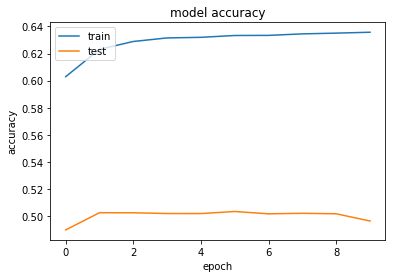

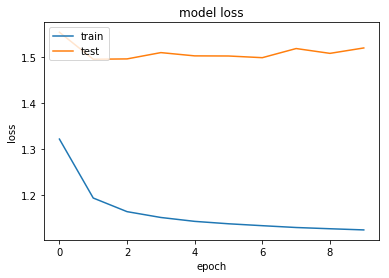

In [12]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 5. 모델 저장 및 평가

In [13]:
model.save('test_model.h5')
model.evaluate(x_train, y_train)

250000/250000 [==============================] - 68s 270us/sample - loss: 1.2408 - acc: 0.5931


[1.2407767069988251, 0.593064]